## Work
1. 請比較使用 l1, l1_l2 及不同比例下的訓練結果

In [18]:
import os
import keras
import itertools

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [24]:
#用l1試試看
def build_mlp(input_shape, output_units=10, num_neurons=[512,256,128], l1_ratio=0.0, l2_ratio=0.0):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i , n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                       activation= 'relu', 
                                       name = 'hidden_layer'+str(i+1), 
                                       kernel_regularizer=l1_l2(l1_ratio, l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,
                                       activation='relu',
                                       name= 'hidden_layer'+str(i+1), 
                                       kernel_regularizer=l1_l2(l1_ratio, l2_ratio))(input_layer)
    out = keras.layers.Dense(units= output_units, activation= 'softmax', name= 'output')(x)
    model = keras.models.Model(inputs=[input_layer],outputs=[out])
    return model

In [29]:
"""Code Here
設定超參數
"""
Learning_rate = 1e-3
Epochs=30
Batch_size=256
Momentum=0.95
L1_exp=[0.0, 1e-2, 1e-4, 1e-8]
L2_exp=[0.0, 1e-2, 1e-4, 1e-8]

In [35]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
from keras.regularizers import l1_l2
for l1r,l2r in itertools.product(L1_exp, L2_exp):
    keras.backend.clear_session()
    print("L1: %.6f , L2: %6f" %(l1r,l2r))
    model = build_mlp(input_shape=x_train.shape[1:],l1_ratio=l1r, l2_ratio=l2r)
    model.summary()
    optimizer= keras.optimizers.SGD(lr=Learning_rate, nesterov=True, momentum=Momentum)
    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    
    model.fit(x_train,y_train,
              epochs=Epochs,
              batch_size=Batch_size,
              validation_data=(x_test,y_test),
              shuffle =True)
    #collect result
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_tag = "L1r: %.6f, L2r: %.6f" %(l1r,l2r)
    results[exp_tag]={"train-loss":train_loss,
                     "valid-loss":valid_loss,
                     "train-acc":train_acc,
                     "valid-acc":valid_acc}

L1: 0.000000 , L2: 0.000000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               393344    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 11s 218us/step - loss: 2.0239 - acc: 0.2781 - val_loss: 1.8799 - val_acc: 0.3430
Epoch 2/30
50000/50000 [==============================] - 5s 100us/step - loss: 1.8388 - acc: 0.3582 - val_loss: 1.8061 - val_acc: 0.3688
Epoch 3/30
50000/50000 [=====================

50000/50000 [==============================] - 5s 95us/step - loss: 1.7774 - acc: 0.4676 - val_loss: 1.7796 - val_acc: 0.4591
Epoch 19/30
50000/50000 [==============================] - 5s 103us/step - loss: 1.7473 - acc: 0.4702 - val_loss: 1.7548 - val_acc: 0.4599
Epoch 20/30
50000/50000 [==============================] - 5s 104us/step - loss: 1.7222 - acc: 0.4726 - val_loss: 1.7345 - val_acc: 0.4593
Epoch 21/30
50000/50000 [==============================] - 5s 98us/step - loss: 1.6998 - acc: 0.4750 - val_loss: 1.7231 - val_acc: 0.4555
Epoch 22/30
50000/50000 [==============================] - 5s 96us/step - loss: 1.6804 - acc: 0.4792 - val_loss: 1.6909 - val_acc: 0.4720
Epoch 23/30
50000/50000 [==============================] - 5s 101us/step - loss: 1.6619 - acc: 0.4800 - val_loss: 1.6909 - val_acc: 0.4532
Epoch 24/30
50000/50000 [==============================] - 5s 107us/step - loss: 1.6483 - acc: 0.4818 - val_loss: 1.6766 - val_acc: 0.4625
Epoch 25/30
50000/50000 [=================

50000/50000 [==============================] - 5s 103us/step - loss: 1.6997 - acc: 0.4113 - val_loss: 1.6903 - val_acc: 0.4111
Epoch 6/30
50000/50000 [==============================] - 5s 96us/step - loss: 1.6681 - acc: 0.4219 - val_loss: 1.6646 - val_acc: 0.4164
Epoch 7/30
50000/50000 [==============================] - 5s 95us/step - loss: 1.6402 - acc: 0.4315 - val_loss: 1.6425 - val_acc: 0.4251
Epoch 8/30
50000/50000 [==============================] - 5s 103us/step - loss: 1.6171 - acc: 0.4394 - val_loss: 1.6262 - val_acc: 0.4263
Epoch 9/30
50000/50000 [==============================] - 5s 98us/step - loss: 1.5958 - acc: 0.4477 - val_loss: 1.6028 - val_acc: 0.4421
Epoch 10/30
50000/50000 [==============================] - 5s 97us/step - loss: 1.5766 - acc: 0.4552 - val_loss: 1.5899 - val_acc: 0.4415
Epoch 11/30
50000/50000 [==============================] - 5s 104us/step - loss: 1.5617 - acc: 0.4611 - val_loss: 1.5772 - val_acc: 0.4497- loss: 1.5638 - acc:
Epoch 12/30
50000/50000 [=

50000/50000 [==============================] - 5s 104us/step - loss: 2.1895 - acc: 0.1881 - val_loss: 2.2231 - val_acc: 0.1821
Epoch 29/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.1878 - acc: 0.1867 - val_loss: 2.1931 - val_acc: 0.1890
Epoch 30/30
50000/50000 [==============================] - 5s 98us/step - loss: 2.1866 - acc: 0.1891 - val_loss: 2.1813 - val_acc: 0.1905
L1: 0.010000 , L2: 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               393344    
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
___________________________________

50000/50000 [==============================] - 5s 109us/step - loss: 2.2066 - acc: 0.1848 - val_loss: 2.2150 - val_acc: 0.1889
Epoch 16/30
50000/50000 [==============================] - 6s 115us/step - loss: 2.2049 - acc: 0.1838 - val_loss: 2.2171 - val_acc: 0.1848
Epoch 17/30
50000/50000 [==============================] - 5s 108us/step - loss: 2.2034 - acc: 0.1846 - val_loss: 2.2151 - val_acc: 0.1777
Epoch 18/30
50000/50000 [==============================] - 5s 109us/step - loss: 2.2016 - acc: 0.1849 - val_loss: 2.2013 - val_acc: 0.1806
Epoch 19/30
50000/50000 [==============================] - 6s 121us/step - loss: 2.1986 - acc: 0.1873 - val_loss: 2.2013 - val_acc: 0.1896
Epoch 20/30
50000/50000 [==============================] - 6s 111us/step - loss: 2.1985 - acc: 0.1863 - val_loss: 2.2033 - val_acc: 0.1844
Epoch 21/30
50000/50000 [==============================] - 6s 120us/step - loss: 2.1962 - acc: 0.1879 - val_loss: 2.1971 - val_acc: 0.1915
Epoch 22/30
50000/50000 [==============

50000/50000 [==============================] - 5s 98us/step - loss: 2.6806 - acc: 0.3562 - val_loss: 2.6463 - val_acc: 0.3663
Epoch 3/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.6049 - acc: 0.3804 - val_loss: 2.5858 - val_acc: 0.3856
Epoch 4/30
50000/50000 [==============================] - 5s 104us/step - loss: 2.5520 - acc: 0.3933 - val_loss: 2.5338 - val_acc: 0.4000
Epoch 5/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.5052 - acc: 0.4086 - val_loss: 2.4912 - val_acc: 0.4097
Epoch 6/30
50000/50000 [==============================] - 5s 97us/step - loss: 2.4653 - acc: 0.4164 - val_loss: 2.4578 - val_acc: 0.4123
Epoch 7/30
50000/50000 [==============================] - 5s 103us/step - loss: 2.4282 - acc: 0.4238 - val_loss: 2.4259 - val_acc: 0.4220
Epoch 8/30
50000/50000 [==============================] - 5s 99us/step - loss: 2.3934 - acc: 0.4328 - val_loss: 2.3891 - val_acc: 0.4301
Epoch 9/30
50000/50000 [==========================

50000/50000 [==============================] - 6s 110us/step - loss: 1.6829 - acc: 0.4729 - val_loss: 1.6974 - val_acc: 0.4696
Epoch 26/30
50000/50000 [==============================] - 5s 109us/step - loss: 1.6728 - acc: 0.4763 - val_loss: 1.6914 - val_acc: 0.4590
Epoch 27/30
50000/50000 [==============================] - 6s 116us/step - loss: 1.6663 - acc: 0.4774 - val_loss: 1.6831 - val_acc: 0.4623
Epoch 28/30
50000/50000 [==============================] - 6s 110us/step - loss: 1.6596 - acc: 0.4791 - val_loss: 1.6777 - val_acc: 0.4702
Epoch 29/30
50000/50000 [==============================] - 5s 110us/step - loss: 1.6532 - acc: 0.4797 - val_loss: 1.6711 - val_acc: 0.4641
Epoch 30/30
50000/50000 [==============================] - 6s 114us/step - loss: 1.6496 - acc: 0.4800 - val_loss: 1.6639 - val_acc: 0.4719
L1: 0.000100 , L2: 0.000100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLaye

50000/50000 [==============================] - 6s 123us/step - loss: 2.2707 - acc: 0.4576 - val_loss: 2.2825 - val_acc: 0.4488
Epoch 13/30
50000/50000 [==============================] - 6s 129us/step - loss: 2.2451 - acc: 0.4615 - val_loss: 2.2595 - val_acc: 0.4510
Epoch 14/30
50000/50000 [==============================] - 6s 124us/step - loss: 2.2209 - acc: 0.4660 - val_loss: 2.2312 - val_acc: 0.4563
Epoch 15/30
50000/50000 [==============================] - 6s 112us/step - loss: 2.1960 - acc: 0.4693 - val_loss: 2.2143 - val_acc: 0.4541
Epoch 16/30
50000/50000 [==============================] - 6s 116us/step - loss: 2.1731 - acc: 0.4735 - val_loss: 2.1994 - val_acc: 0.4539
Epoch 17/30
50000/50000 [==============================] - 6s 116us/step - loss: 2.1519 - acc: 0.4752 - val_loss: 2.1712 - val_acc: 0.4672
Epoch 18/30
50000/50000 [==============================] - 5s 109us/step - loss: 2.1278 - acc: 0.4817 - val_loss: 2.1608 - val_acc: 0.4608
Epoch 19/30
50000/50000 [==============

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 6s 122us/step - loss: 4.3256 - acc: 0.2761 - val_loss: 4.0174 - val_acc: 0.3502
Epoch 2/30
50000/50000 [==============================] - 6s 113us/step - loss: 3.8238 - acc: 0.3567 - val_loss: 3.6424 - val_acc: 0.3695
Epoch 3/30
50000/50000 [==============================] - 6s 122us/step - loss: 3.4874 - acc: 0.3763 - val_loss: 3.3374 - val_acc: 0.3891
Epoch 4/30
50000/50000 [==============================] - 6s 115us/step - loss: 3.2102 - acc: 0.3932 - val_loss: 3.0878 - val_acc: 0.4019
Epoch 5/30
50000/50000 [==============================] - 6s 113us/step - loss: 2.9758 - acc: 0.4043 - val_loss: 2.8762 - val_acc: 0.4071
Epoch 6/30
50000/50000 [==============================] - 6s 123us/step - loss: 2.7784 - acc: 0.4117 - val_loss: 2.6931 - val_acc: 0.4184
Epoch 7/30
50000/50000 [==============================] - 6s 113us/step - loss: 2.6066 - acc: 0.4231 - val_loss: 2.5366 - 

50000/50000 [==============================] - 6s 118us/step - loss: 1.4679 - acc: 0.5018 - val_loss: 1.5139 - val_acc: 0.4772
Epoch 24/30
50000/50000 [==============================] - 6s 121us/step - loss: 1.4588 - acc: 0.5057 - val_loss: 1.5172 - val_acc: 0.4750
Epoch 25/30
50000/50000 [==============================] - 6s 116us/step - loss: 1.4503 - acc: 0.5095 - val_loss: 1.5045 - val_acc: 0.4842
Epoch 26/30
50000/50000 [==============================] - 6s 120us/step - loss: 1.4403 - acc: 0.5114 - val_loss: 1.4950 - val_acc: 0.4830
Epoch 27/30
50000/50000 [==============================] - 6s 117us/step - loss: 1.4324 - acc: 0.5149 - val_loss: 1.4952 - val_acc: 0.4881
Epoch 28/30
50000/50000 [==============================] - 6s 117us/step - loss: 1.4266 - acc: 0.5177 - val_loss: 1.4833 - val_acc: 0.4845
Epoch 29/30
50000/50000 [==============================] - 6s 123us/step - loss: 1.4170 - acc: 0.5204 - val_loss: 1.4808 - val_acc: 0.4909
Epoch 30/30
50000/50000 [==============

[(1.0, 0.0, 0.16, 1.0), (1.0, 0.19819819819819823, 0.0, 1.0), (1.0, 0.5585585585585586, 0.0, 1.0), (1.0, 0.918918918918919, 0.0, 1.0), (0.7207207207207207, 1.0, 0.0, 1.0), (0.36036036036036034, 1.0, 0.0, 1.0), (0.0, 1.0, 0.0, 1.0), (0.0, 1.0, 0.3584229390681005, 1.0), (0.0, 1.0, 0.716845878136201, 1.0), (0.0, 0.9239130434782604, 1.0, 1.0), (0.0, 0.5615942028985503, 1.0, 1.0), (0.0, 0.19927536231884035, 1.0, 1.0), (0.16304347826086973, 0.0, 1.0, 1.0), (0.5253623188405799, 0.0, 1.0, 1.0), (0.8876811594202902, 0.0, 1.0, 1.0), (1.0, 0.0, 0.75, 1.0)]


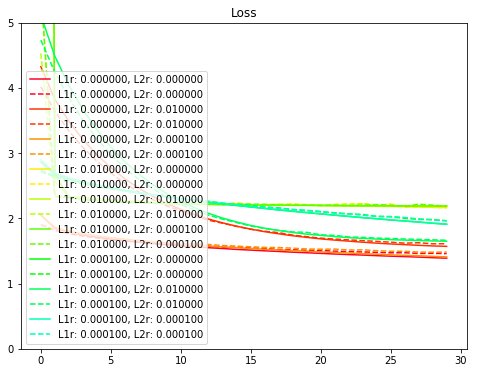

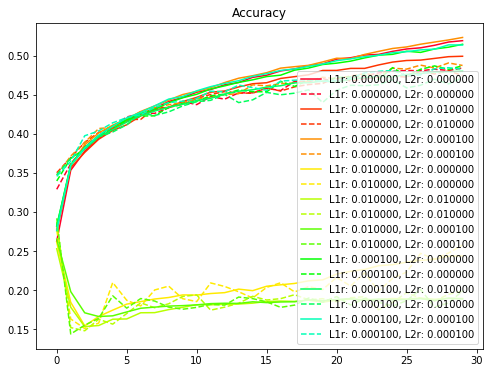

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
import matplotlib.cm as mplcm
import matplotlib.colors as colors
NUM_COLORS=16

cm = plt.get_cmap('gist_rainbow')
cNorm = colors.Normalize(vmin=0, vmax=NUM_COLORS-1) #將vmin和vmax間的數映射成顏色
scalarMap = mplcm.ScalarMappable(norm=cNorm, cmap=cm)
color_bar = [scalarMap.to_rgba(i) for i in range(NUM_COLORS)]
print (color_bar)  #ex.(1.0, 0.19819819819819823, 0.0, 1.0)這是rgba的元組

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]["train-loss"])), results[cond]["train-loss"], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]["valid-loss"])), results[cond]["valid-loss"], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [39]:
print(model.history.history)

{'val_loss': [1.9024353830337524, 1.8171850429534913, 1.7643876134872436, 1.7295097576141358, 1.701405129814148, 1.6738455591201782, 1.6557075326919555, 1.634663752937317, 1.6201145372390746, 1.605485924911499, 1.5986135623931885, 1.5814174474716187, 1.5755799047470094, 1.5556625202178955, 1.5599529895782471, 1.5457863109588623, 1.5379602067947387, 1.5223563848495483, 1.51781632232666, 1.5102640087127686, 1.5072625524520875, 1.4966868923187255, 1.4889714580535889, 1.4849235374450684, 1.4789388292312622, 1.4716933023452758, 1.4729779741287232, 1.4619424430847168, 1.4644059604644775, 1.459123246574402], 'val_acc': [0.329, 0.3617, 0.3834, 0.398, 0.4094, 0.4216, 0.4263, 0.4263, 0.4334, 0.4416, 0.4375, 0.4478, 0.4445, 0.4526, 0.4526, 0.4584, 0.4555, 0.4674, 0.4671, 0.4711, 0.4655, 0.4725, 0.4741, 0.4782, 0.48, 0.4813, 0.4809, 0.4829, 0.4813, 0.4845], 'loss': [2.0485460999679566, 1.8506554195404052, 1.789743886833191, 1.7460166569519042, 1.7109311288070679, 1.681577212638855, 1.6568924984359